<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/bbc_data_EDA_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def data_loader(data_path):

    f = open(data_path)
    data = json.load(f)

    return data

def column_selection(selected_column, data) :
    empty_column = []
    for i in data:
        empty_column.append(i[selected_column])

    return empty_column

def data_cleaner(txt_data):
    # if limit != None:
    clean_data = []
    empty_indices = []
    for i in range(len(txt_data)):
        if txt_data[i] != '':
                # print(content[i])
            clean_data.append(txt_data[i])
        else :
            empty_indices.append(i)
    # print(empty_indices)
    return clean_data , empty_indices        

def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            # list_object.pop(idx)
            del list_object[idx] 


def index_returner(df,unique_region):
    x = df[df['region'] == unique_region].index
    return x       

def char_counter(x):
    return  len(x)

def token_counter(x):
    return len(x.split())          

In [3]:
import os 
import json
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import *

plt.style.use('ggplot')

In [4]:
input_path = 'drive/MyDrive/bbc_news_list_uk.json'
data = data_loader(input_path)
print(data[0].keys())

dict_keys(['tags', 'title', 'news_post_date', 'raw_content', 'content', 'url', 'author', 'language', '_id', 'region', 'short_description', 'category', 'crawled_at'])


In [5]:
content = column_selection('content', data)
title = column_selection('title', data)
region  = column_selection('region', data)
short_desc = column_selection('short_description', data)
category = column_selection('category', data)

In [6]:
print('content_len:', len(content))
print('title_len:', len(title))
print('region_len:', len(region))
print('desc_len:', len(short_desc))
print('category_len:', len(category))

content_len: 15825
title_len: 15825
region_len: 15825
desc_len: 15825
category_len: 15825


In [7]:
for i in range(len(region)):
    if region[i] == '':
        region[i] = 'NO_INFO'

In [8]:
clean_content,empty_indices_content = data_cleaner(content)

In [9]:
clean_title,empty_indices_title = data_cleaner(title)
clean_region,empty_indices_region = data_cleaner(region)
clean_short_desc,empty_indices_short_desc = data_cleaner(short_desc)
clean_category,empty_indices_category = data_cleaner(category)

In [10]:
# delete_multiple_element(clean_content,empty_indices_content)
delete_multiple_element(clean_title,empty_indices_content)
delete_multiple_element(clean_region,empty_indices_content)
delete_multiple_element(clean_short_desc,empty_indices_content)
delete_multiple_element(clean_category,empty_indices_content)

In [11]:
print('Clean Content Length :',len(clean_content))
print('Clean Title Length :',len(clean_title))
print('Clean Region Length :',len(clean_region))
print('Clean ShortDescription Length :',len(clean_short_desc))
print('Clean Category Length :',len(clean_category))

Clean Content Length : 15468
Clean Title Length : 15468
Clean Region Length : 15468
Clean ShortDescription Length : 15468
Clean Category Length : 15468


In [12]:
df_clean = pd.DataFrame({
    'content': clean_content,
    'title' : clean_title,
    'region' : clean_region,
    'desc' : clean_short_desc,
    'category' : clean_category
})
df_clean.head(1)

,content,title,region,desc,category
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News


In [13]:
print('number of unique region :',df_clean['region'].nunique())
# print(df_clean['region'].unique())

number of unique region : 84


In [14]:
new_df = pd.DataFrame(df_clean.groupby(['region'])['region'].count())
new_df = new_df.rename(columns = {'region':'counts'})
new_df = new_df.reset_index()


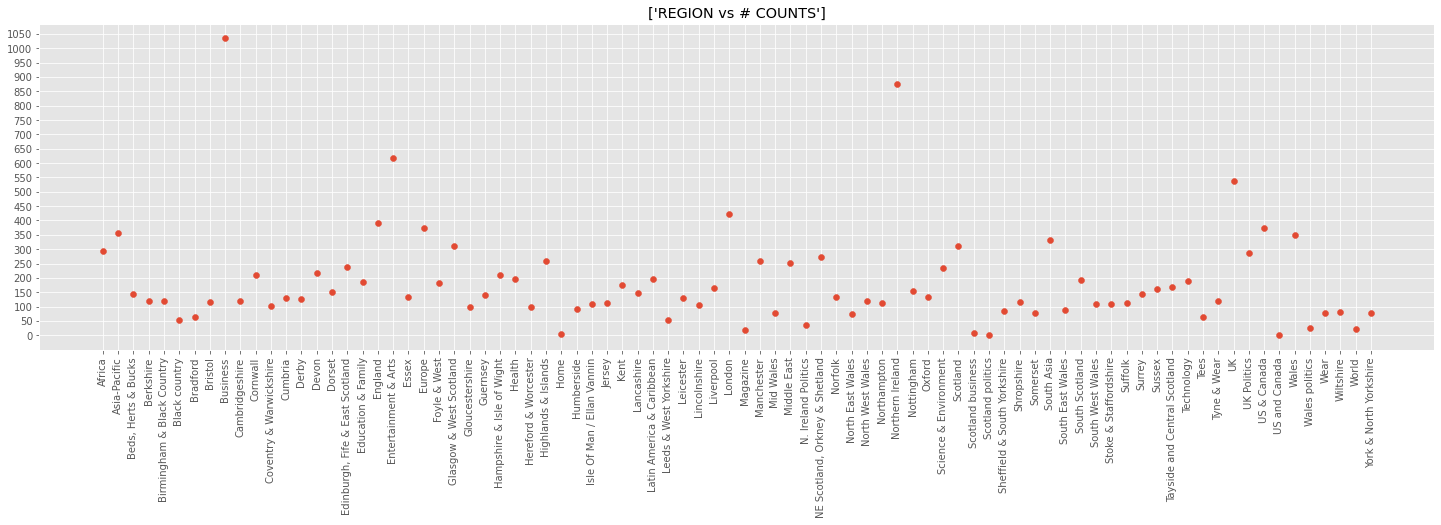

In [15]:
plt.figure(figsize=(25,6))
plt.scatter(new_df['region'], new_df['counts'])
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1100, 50));
plt.title(['REGION vs # COUNTS']);

In [16]:
# def json_maker(query, id, content, title, region, desc):
#     return {'query':str(query),'ID':id,'CONTENT':content, 'TITLE':title, 'REGION':region, 'DESCRIPTION':desc}
# def info_print(index_num):
    
#     print('CONTENT:', df_clean['content'][index_num])
#     print('TITLE:', df_clean['title'][index_num])
#     print('REGION:', df_clean['region'][index_num])
#     print('DESC:', df_clean['desc'][index_num])

In [17]:
df_clean['content_char_length'] = df_clean['content'].apply(char_counter)
df_clean['content_token_length'] = df_clean['content'].apply(token_counter)

print('MEAN VALUE FOR THE CONTENT CHAR LENGTH :',np.mean(df_clean['content_char_length']))
print('MEDIAN VALUE FOR THE CONTENT CHAR LENGTH :',np.median(df_clean['content_char_length']))

print('MEAN VALUE FOR THE CONTENT TOKEN LENGTH :',np.mean(df_clean['content_token_length']))
print('MEDIAN VALUE FOR THE CONTENT TOKEN LENGTH :',np.median(df_clean['content_token_length']))

MEAN VALUE FOR THE CONTENT CHAR LENGTH : 1754.240302560124
MEDIAN VALUE FOR THE CONTENT CHAR LENGTH : 1404.0
MEAN VALUE FOR THE CONTENT TOKEN LENGTH : 289.42649340574087
MEDIAN VALUE FOR THE CONTENT TOKEN LENGTH : 231.0


In [18]:
df_clean.head(3)

,content,title,region,desc,category,content_char_length,content_token_length
0,The heroin substitute methadone can be used as...,Why quitting heroin substitute methadone is 'v...,Health,Heroin substitute methadone is used to wean ad...,BBC News,5234,907
1,The eldest son of North Korean leader Kim Jong...,North Korea leader's eldest son 'opposes dynasty',Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2039,346
2,Seven oil paintings created by notorious gangs...,Paintings by gangster Reggie Kray go on sale i...,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,1486,259


## CLUSTERING & DIMENSIONALITY REDUCTION

In [19]:
!pip install umap-learn -q
!pip install hdbscan -q
!pip install umap-learn[plot] -q

In [20]:
import umap ### dimensionality reduction algorithm
import hdbscan ### clustering algorithm
import umap.plot
from hdbscan import flat
import plotly.express as px
from sklearn import preprocessing


In [21]:
le = preprocessing.LabelEncoder()
le.fit_transform(df_clean['region'])

array([27,  1, 39, ..., 27,  7, 74])

In [22]:
### BBC VECTOR EMBEDDINGS
vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

(15468, 1536)


In [23]:
# umap_data = umap.UMAP(n_neighbors=20, n_components=2, min_dist=0, metric='euclidean').fit_transform(embedding_vectors)
n_neighbors = 200,
min_dist = 0.01

umap_embeddings = (umap.UMAP(n_neighbors = 200, min_dist = 0.01, random_state = 42).fit_transform(embedding_vectors))

In [24]:
# 20,50
min_cluster_size = 50
min_samples =  20

clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                           min_samples = min_samples ,
                               metric='euclidean', 
                            #    cluster_selection_method='eom'
                               ).fit(umap_embeddings)

print('min_cluster_size:',min_cluster_size )
print('min_samples:',min_samples)
print('NUMBER OF OUTLIERS:',len(np.where(np.array(clusters.labels_) == -1)[0])) 
print('NUMBER OF CLUSTERS:',len((set(clusters.labels_))))                          

min_cluster_size: 50
min_samples: 20
NUMBER OF OUTLIERS: 4219
NUMBER OF CLUSTERS: 46


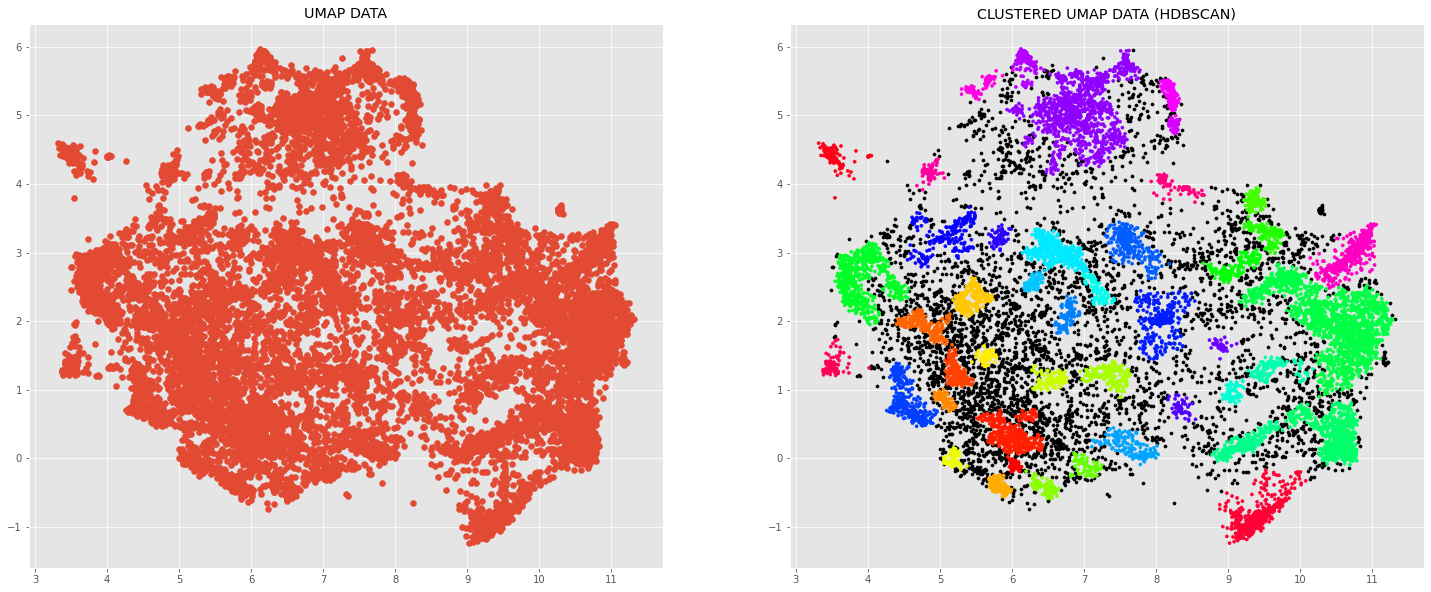

In [25]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1])
plt.title('UMAP DATA')

plt.subplot(1,2,2)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = clusters.labels_
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y,color='black',s=10)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10,cmap='hsv_r')
# plt.colorbar()
plt.title('CLUSTERED UMAP DATA (HDBSCAN)');

In [26]:
# !pip install transformers -q
# from transformers import GPT2Tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# gpt_tokenizer = []
# for i in range(len(df_clean)):
#     gpt_tokens = tokenizer.encode(df_clean['content'][i])
#     gpt_tokenizer.append(len(gpt_tokens))
# np.where(np.array(gpt_tokenizer) > 8192)

In [27]:
##https://scanpy.readthedocs.io/en/stable/installation.html  LEIDEN CLUSTERING

## LEIDEN VIA SCANPY

In [28]:
!pip install 'scanpy[leiden]' -q
!pip install anndata -q
import anndata
import scanpy as sc

In [40]:
n_neighbors = 200,
min_dist = 0.01
adata = anndata.AnnData(embedding_vectors, dtype = 'float32')
sc.pp.neighbors(adata, 
                # n_pcs = 18,
                n_neighbors = 200)
sc.tl.umap(adata,min_dist = min_dist,random_state = 42)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [42]:
sc.tl.leiden(adata, 
             resolution = 4,
             n_iterations = -1
             )
labels = list(adata.obs['leiden'])
labels = [int(i) for i in labels]
print('NUMBER OF LABELS',len(set(labels)))

NUMBER OF LABELS 47


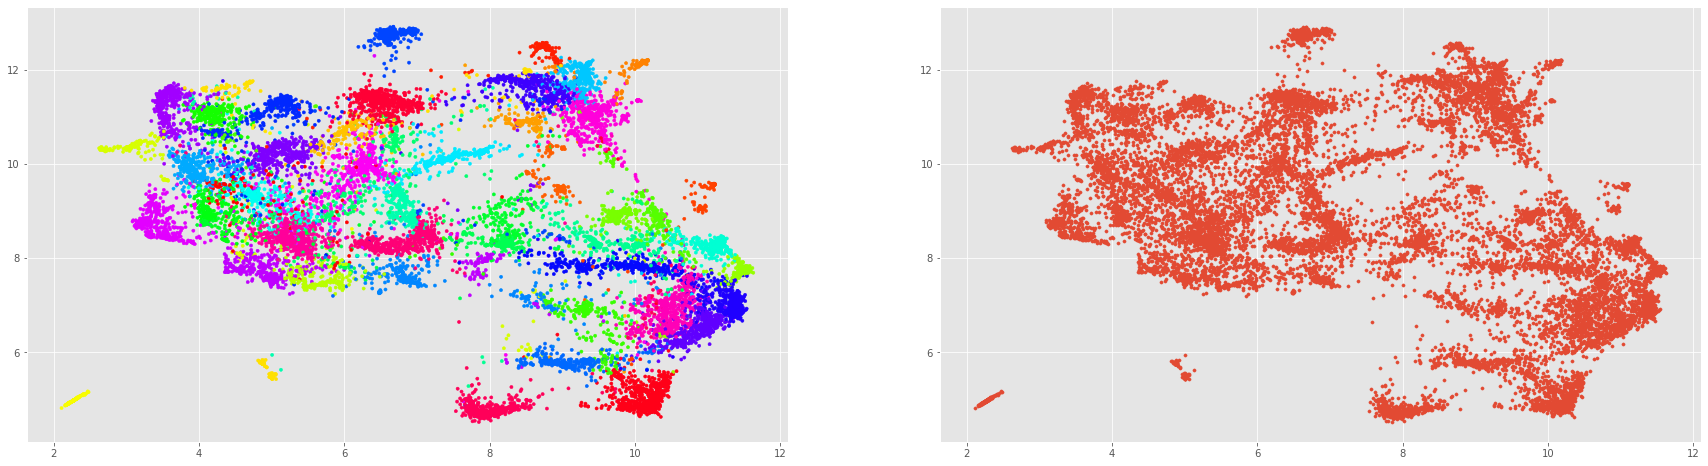

In [44]:
umap_embs = adata.obsm['X_umap']
result = pd.DataFrame(umap_embs, columns=['x', 'y'])
result['labels'] = labels

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.scatter(result.x, result.y, c=result.labels, s=10,
            cmap='hsv_r'
            )

plt.subplot(1,2,2)
plt.scatter(result.x, result.y, 
            # c=result.labels,
            s=10,
            # cmap='hsv_r'
            )